# Preprocessing

> Utility functions to preprocess spectra.

In [ ]:
#| default_exp preprocessing

In [ ]:
#| export
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.signal import savgol_filter

In [ ]:
#| eval: false
from uhina.loading import OSSLLoader
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import fastcore.all as fc

In [ ]:
#|export
class SNV(BaseEstimator, TransformerMixin):
    """Creates scikit-learn SNV custom transformer"""
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        mean, std = np.mean(X, axis=1).reshape(-1, 1), np.std(X, axis=1).reshape(-1, 1)
        return (X - mean)/std

In [ ]:
#|export
class TakeDerivative(BaseEstimator, TransformerMixin):
    """Creates scikit-learn derivation custom transformer

    Args:
        window_length: int, optional
            Specify savgol filter smoothing window length

        polyorder: int, optional
            Specify order of the polynom used to interpolate derived signal

        deriv: int, optional
            Specify derivation degree

    Returns:
        scikit-learn custom transformer
    """
    def __init__(self, window_length=11, polyorder=1, deriv=1):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return savgol_filter(X, self.window_length, self.polyorder, self.deriv)


Usage example:

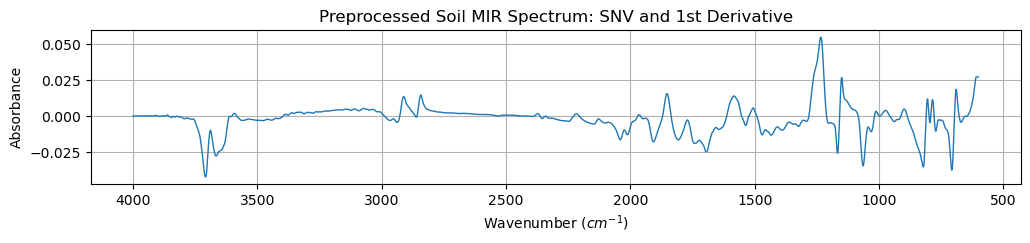

In [ ]:
#| eval: false
X, y, wavenumbers, smp_idx, ds_name, ds_label = fc.load_pickle('./files/spectrum-and-all.pkl')

#| eval: false
pipe = Pipeline([
    ('SNV', SNV()),
    ('Derivative', TakeDerivative())
])

# Preprocess spectra
X_trans = pipe.fit_transform(X)

# Plot first preprocessed spectrum
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(wavenumbers, X_trans[0, :], lw=1)
ax.set_xlabel('Wavenumber ($cm^{-1}$)')
ax.set_ylabel('Absorbance')
ax.set_title('Preprocessed Soil MIR Spectrum: SNV and 1st Derivative')
ax.grid(True)
ax.invert_xaxis()